# Exercise

**(1)** CAPM with itau stocks and the ibovespa index (brazilian stock index):
> **(a)** Univariate linear regression with the market factor

> **(b)** Hypothesis test - $H_0$: $\beta=1$

**(2)** APT with itau stocks explained by the market index (ibovespa), momentum, value, illiquidity, and size factors:
> **(a)** Multivariate linear regression with the factors

> **(b)** Hypothesis test - $H_0$: $\sum_{i=1}^{5}\beta_i=1$

In [1]:
library(here)
library(readxl)
library(car)

Warning message:
"package 'here' was built under R version 3.6.3"here() starts at C:/Users/Daniel/Desktop/Daniel/codes/python/FGV_Financial_Econometrics
Warning message:
"package 'car' was built under R version 3.6.3"Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.6.3"

In [3]:
df = read_excel(here('src', 'data', 'dados_portfolio.xlsx'))
head(df)

Data,PETR4,rcppet,ITAUSA,rcpitausa,IBOV,rcpibov,BM1,BM1p,BM2,...,Mom2,Mom2p,Mom3,Mom3p,ILLIQ1,ILLIQ1p,ILLIQ2,ILLIQ2p,ILLIQ3,ILLIQ3p
2001-01-02,2.822474,2.8213380,0.2695546,-1.5666102,15425,1.0820077,-0.008020660,-0.8020660,-0.009106201,...,0.050059196,5.0059196,0.002738827,0.2738827,-0.004059543,-0.4059543,0.056667209,5.6667209,0.010049764,1.0049764
2001-01-03,2.975915,5.2937754,0.2879978,6.6181905,16599,7.3352883,0.071019791,7.1019791,0.062202081,...,0.069391854,6.9391854,0.068765141,6.8765141,0.083359264,8.3359264,0.066459663,6.6459663,0.087869622,8.7869622
2001-01-04,2.996894,0.7024584,0.2851603,-0.9901062,16675,0.4568139,0.000996872,0.0996872,0.007382796,...,-0.007310275,-0.7310275,-0.000676961,-0.0676961,0.004370704,0.4370704,-0.007697583,-0.7697583,-0.004855833,-0.4855833
2001-01-05,2.968723,-0.9444483,0.2794855,-2.0101160,16409,-1.6080627,-0.008905386,-0.8905386,-0.006155613,...,-0.011557406,-1.1557406,-0.003794188,-0.3794188,-0.018392449,-1.8392449,-0.012300227,-1.2300227,0.006731826,0.6731826
2001-01-08,2.960331,-0.2830560,0.2823229,1.0101086,16562,0.9280950,0.006842936,0.6842936,0.009757482,...,0.006140224,0.6140224,0.002387666,0.2387666,0.007300743,0.7300743,0.002003660,0.2003660,0.006125503,0.6125503
2001-01-09,3.022667,2.0838280,0.2837416,0.5012537,16975,2.4630759,0.022935860,2.2935860,0.028703423,...,0.013163301,1.3163301,0.031327028,3.1327028,0.024950778,2.4950778,0.019179260,1.9179260,0.020972461,2.0972461


In [32]:
dim(df)

[1] 4868   31

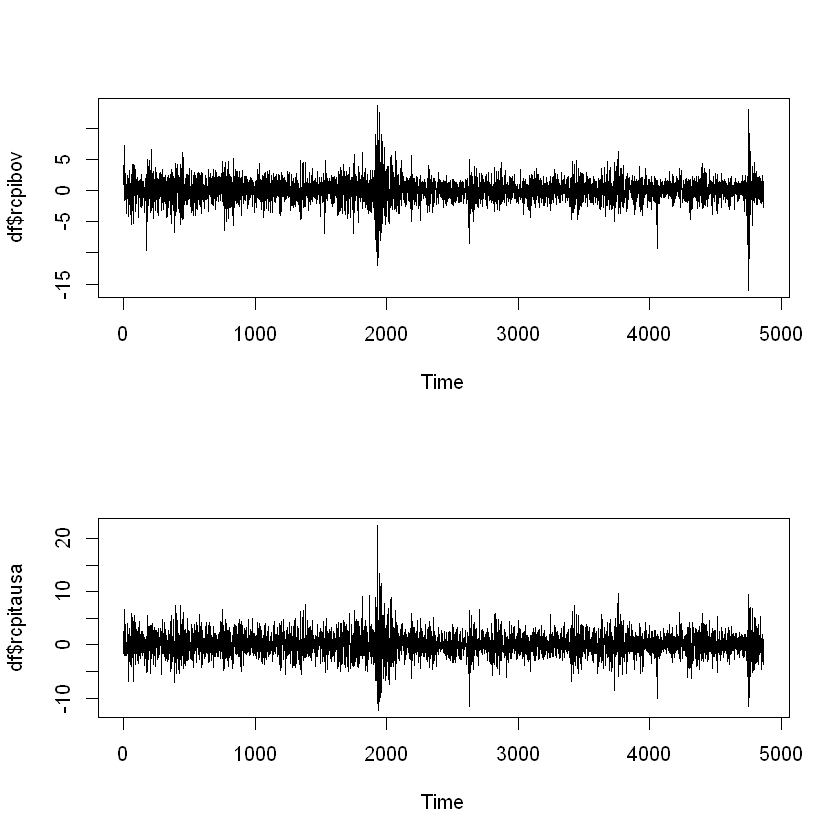

In [36]:
par(mfrow=c(2, 1))
ts.plot(df$rcpibov)
ts.plot(df$rcpitausa)

**(1)** CAPM
> **(a)** Univariate linear regression with the market factor

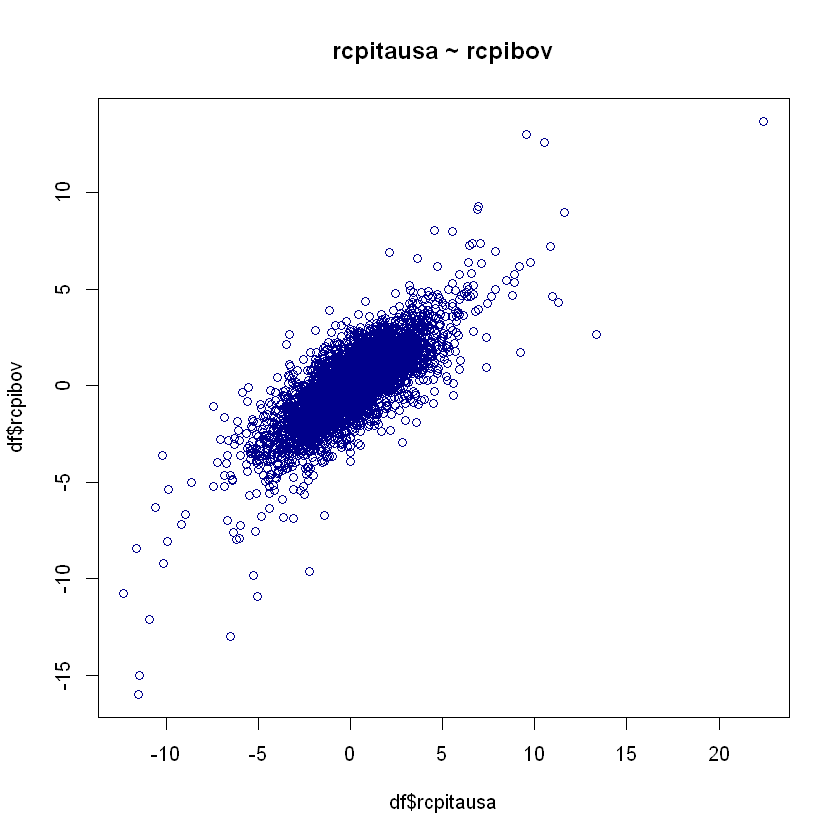

In [54]:
plot.default(df$rcpitausa, df$rcpibov, col='darkblue')
#abline(coef(regressao_df2), col='red')
#legend('topleft', col=c('red'), pch=15)
title('rcpitausa ~ rcpibov')

In [73]:
model1 = lm(rcpitausa ~ rcpibov, df)
summary(model1)

ERROR: Error in L(rcpitausa, 1): could not find function "L"


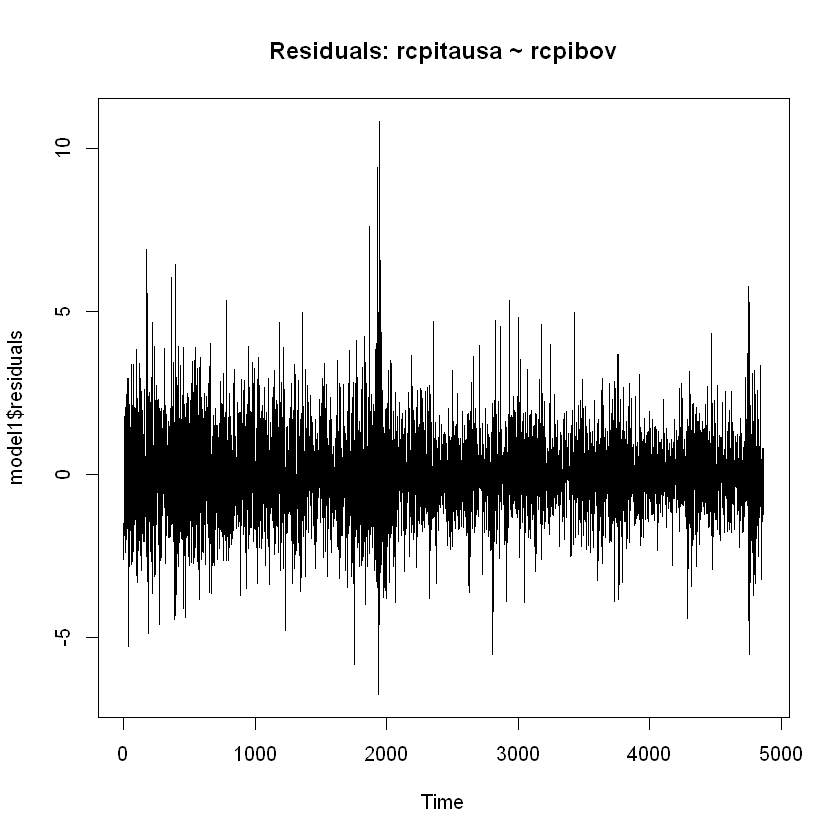

In [56]:
ts.plot(model1$residuals)
title('Residuals: rcpitausa ~ rcpibov')

[1] 1945 1930

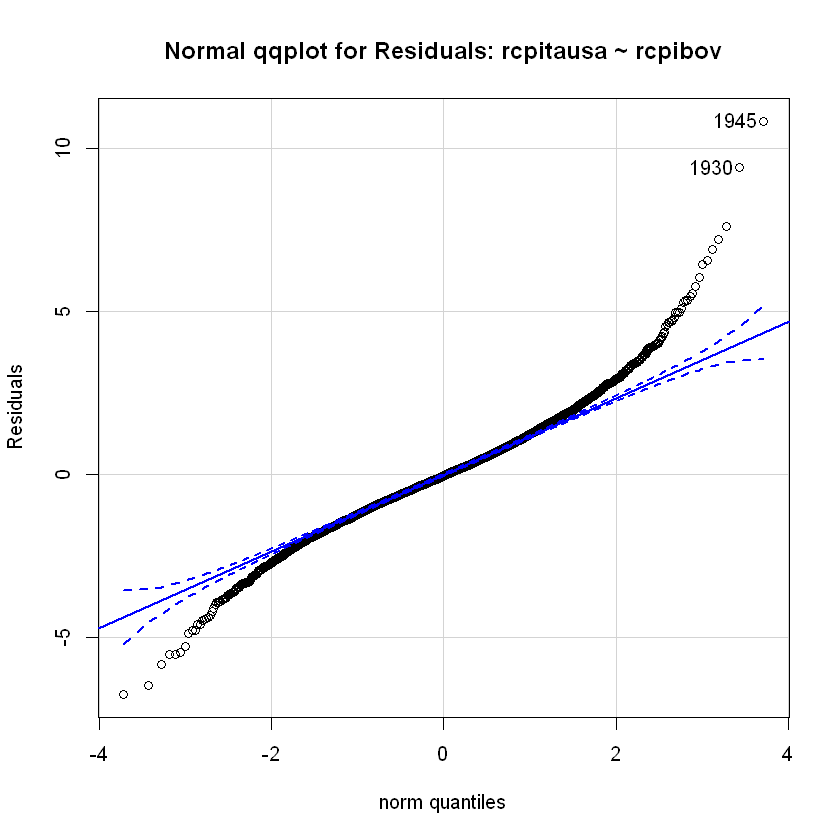

In [57]:
qqPlot(model1$residuals, ylab=paste("Residuals"), main="Normal qqplot for Residuals: rcpitausa ~ rcpibov")

> **(b)** Hypothesis test - $H_0$: $\beta=1$

In [61]:
linearHypothesis(model1,c("rcpibov=1"))

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
4867,9267.829,NA,NA,NA,NA
4866,9227.542,1,40.28734,21.2449,4.145257e-06


The p-value for the test is less then the threshold of 0.05, therefore we cant reject the null hypothesis

**(2)** APT
> **(a)** Multivariate linear regression with the factors


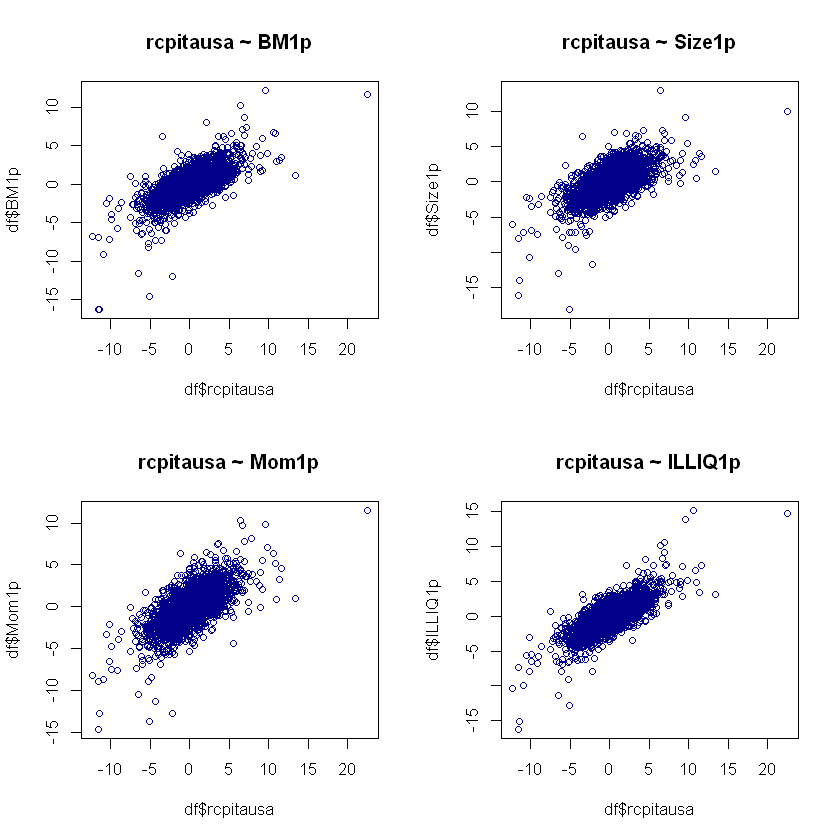

In [58]:
par(mfrow=c(2,2))
plot.default(df$rcpitausa, df$BM1p, col='darkblue')
title('rcpitausa ~ BM1p')
plot.default(df$rcpitausa, df$Size1p, col='darkblue')
title('rcpitausa ~ Size1p')
plot.default(df$rcpitausa, df$Mom1p, col='darkblue')
title('rcpitausa ~ Mom1p')
plot.default(df$rcpitausa, df$ILLIQ1p, col='darkblue')
title('rcpitausa ~ ILLIQ1p')

In [66]:
model2 = lm(rcpitausa ~ rcpibov + BM1p + Size1p + Mom1p + ILLIQ1p, df)
summary(model2)


Call:
lm(formula = rcpitausa ~ rcpibov + BM1p + Size1p + Mom1p + ILLIQ1p, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.0758 -0.8085 -0.0347  0.7587 10.2569 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.03185    0.01951   1.633   0.1026    
rcpibov      0.76062    0.04662  16.315  < 2e-16 ***
BM1p        -0.08451    0.03839  -2.201   0.0278 *  
Size1p      -0.06956    0.03352  -2.075   0.0380 *  
Mom1p       -0.14161    0.03456  -4.097 4.25e-05 ***
ILLIQ1p      0.46067    0.05211   8.840  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.357 on 4862 degrees of freedom
Multiple R-squared:  0.6206,	Adjusted R-squared:  0.6202 
F-statistic:  1591 on 5 and 4862 DF,  p-value: < 2.2e-16


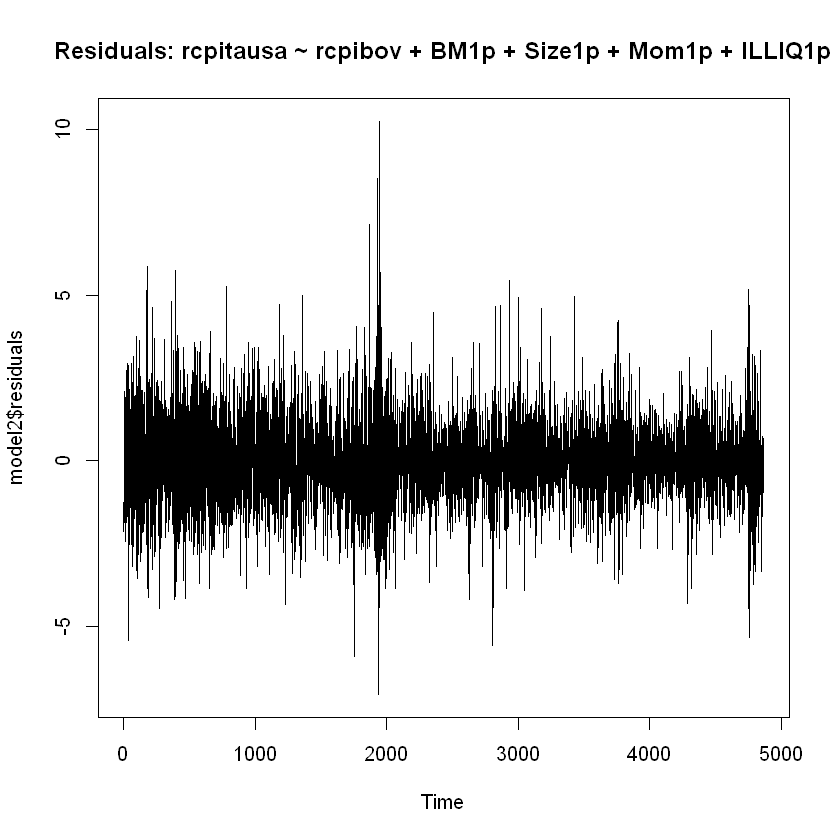

In [67]:
ts.plot(model2$residuals)
title('Residuals: rcpitausa ~ rcpibov + BM1p + Size1p + Mom1p + ILLIQ1p')

[1] 1945 1930

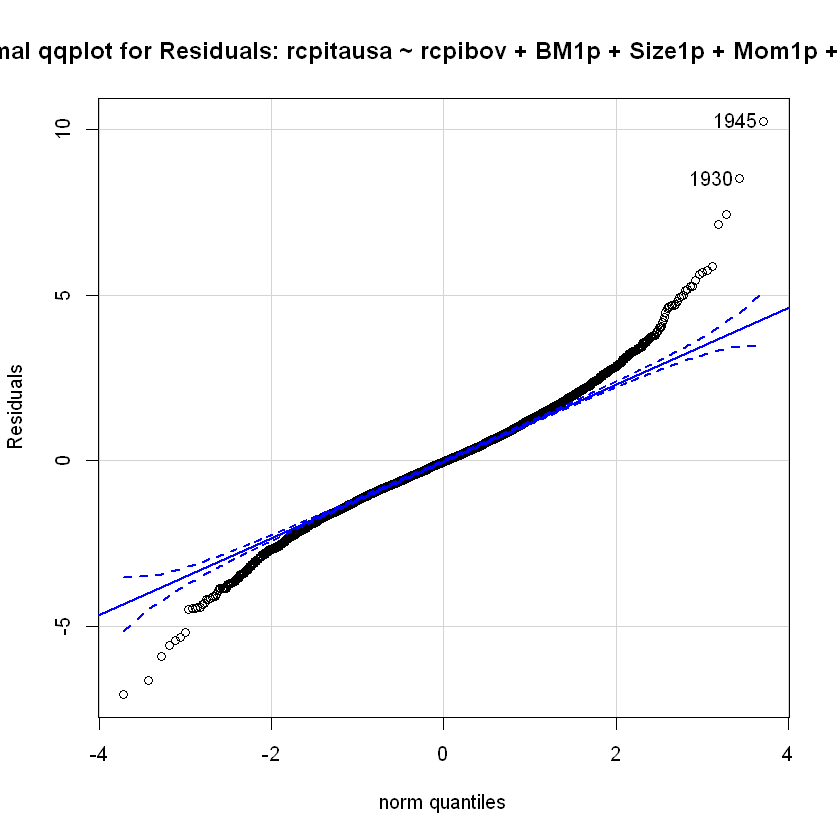

In [68]:
qqPlot(model2$residuals, ylab=paste("Residuals"), main="Normal qqplot for Residuals: rcpitausa ~ rcpibov + BM1p + Size1p + Mom1p + ILLIQ1p")

> **(b)** Hypothesis test - $H_0$: $\sum_{i=1}^{5}\beta_i=1$

In [70]:
linearHypothesis(model2,c("rcpibov + BM1p + Size1p + Mom1p + ILLIQ1p=1"))

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
4863,9016.350,NA,NA,NA,NA
4862,8956.603,1,59.747,32.43305,1.30624e-08
